# Hugging Face | Audio Course | Hand on exercise

Installing required libraries for exercise

In [ ]:
pip install transformers pipeline datasets librosa gradio

Load required dataset with enginesh as prefered language and Set streaming mode on

In [ ]:
from datasets import load_dataset
voxpopuli_croatian = load_dataset("facebook/voxpopuli", "en", streaming=True)

Get 3rd example from dataset and check its features

In [ ]:
three_exp = voxpopuli_croatian['train'].take(3)
third_exp = list(three_exp)[2]
third_exp

In [ ]:
third_exp['audio']['array']

**Plot time domain representation:**

Time domain representation will give idea about change in amplitude of audio over time.

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

array = third_exp['audio']['array']
sampling_rate = third_exp['audio']['sampling_rate']
plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)

**Plot Frequency domain representation:**

In [ ]:
import numpy as np

dft_input = array[:4096]

#calculate dft
window = np.hanning(len(dft_input))

In [ ]:
window

array([0.00000000e+00, 5.88561497e-07, 2.35424460e-06, ...,
       2.35424460e-06, 5.88561497e-07, 0.00000000e+00])

In [ ]:
dft_input

array([ 2.01416016e-03, -3.44848633e-03, -4.60815430e-03, ...,
        1.83105469e-04,  0.00000000e+00, -6.10351562e-05])

In [ ]:
windowed_input = dft_input * window
windowed_input

array([ 0.00000000e+00, -2.02964628e-09, -1.08487224e-08, ...,
        4.31075062e-10,  0.00000000e+00, -0.00000000e+00])

In [ ]:
dft = np.fft.rfft(windowed_input)
dft

array([ 0.00123336+0.j        , -0.00048674-0.00239678j,
       -0.00088534-0.00283758j, ...,  0.00593166-0.01219983j,
       -0.01296703+0.00563649j,  0.01254164+0.j        ])

In [ ]:
#amplitude spectrum in decibles
amplitude = np.abs(dft)
amplitude_db = librosa.amplitude_to_db(amplitude,ref=np.max)
amplitude_db

array([-55.58108643, -49.63477028, -47.9404709 , ..., -34.75420173,
       -34.39443359, -35.43577464])

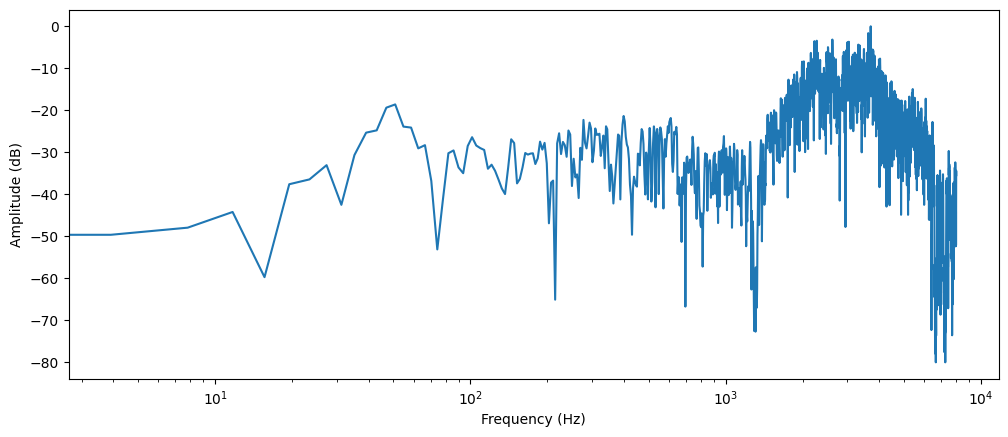

In [ ]:
# get the frequency bins
frequency = librosa.fft_frequencies(sr=sampling_rate, n_fft=len(dft_input))

plt.figure().set_figwidth(12)
plt.plot(frequency, amplitude_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.xscale("log")

# **Spectrogram**

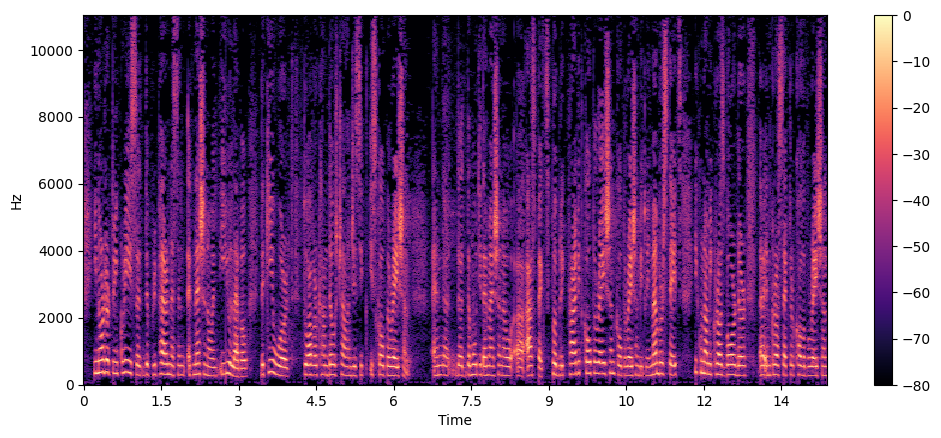

In [ ]:
D = librosa.stft(array)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis='time', y_axis = 'hz')
plt.colorbar()

**Mel spectrogram**

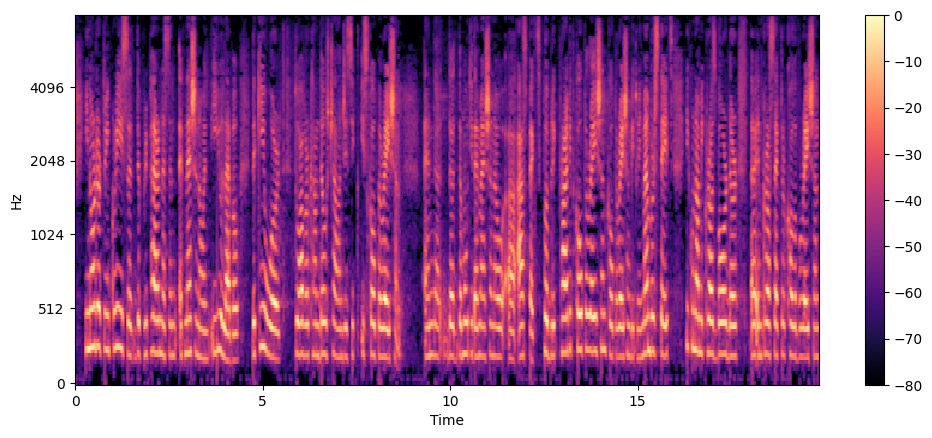

In [ ]:
S = librosa.feature.melspectrogram(y=array, sr=sampling_rate, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_dB, x_axis="time", y_axis="mel", sr=sampling_rate, fmax=8000)
plt.colorbar()

# **Automatic Speech Recognition**

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("automatic-speech-recognition", model="openai/whisper-base")

In [ ]:
third_exp

In [ ]:
pipe(array)['text']

' In order to increase the preparedness at national and EU level, the key word to overcome those challenges is cooperation. And the multidimensional aspects, public-private cooperation, cooperation between member states, economic cross-border and cross-sector collaboration'

# **Create Ui using Gradio for above exercise**

In [5]:
def get_indexed_element(dataset,data_index):
  print("inside get_index")
  example = dataset['train'].take(data_index)
  print("after example")
  element = list(example)[data_index-1]
  print("after element")
  return element

In [6]:
def get_frequency_domain_plot(array, sampling_rate):
  def_input = array[:4096]
  window = np.hanning(len(def_input))
  window_input = def_input * window
  dft = np.fft.rfft(window_input)

  amplitude = np.abs(dft)
  amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)

  frequencies = librosa.fft_frequencies(sr=sampling_rate, n_fft=len(def_input))

  return amplitude_db , frequencies

In [ ]:
import gradio as gr
# Use a pipeline as a high-level helper
from transformers import pipeline
from datasets import load_dataset
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

pipe = pipeline("automatic-speech-recognition", model="openai/whisper-base")
voxpopuli_croatian = load_dataset("facebook/voxpopuli", "en", streaming=True)

def plot_and_text(data_index):
  example = get_indexed_element(voxpopuli_croatian,int(data_index))
  array = example['audio']['array']
  original_text = example['normalized_text']
  asr_text = pipe(array)['text']
  # Create frequency domain graph

  sampling_rate = example['audio']['sampling_rate']
  amplitude_db , frequencies = get_frequency_domain_plot(array,sampling_rate)
  fig1 = plt.figure(12)
  plt.plot(frequencies, amplitude_db)
  plt.xlabel("Frequency (Hz)")
  plt.ylabel("Amplitude (dB)")
  plt.xscale("log")

  # Create the two text outputs
  text1_output = gr.Textbox(value=original_text)
  text2_output = gr.Textbox(value=asr_text)

  # Return the outputs
  return [fig1,text1_output, text2_output]

# Create the interface
interface = gr.Interface(fn=plot_and_text, inputs=gr.Textbox(label="Input any integer upto 500"), outputs=[gr.Plot(label="Frequency domain plot"), gr.Textbox(label="Original Text"), gr.Textbox(label="ASR Generated text")])

# Launch the interface
interface.launch(debug=True)


ERROR: Could not find a version that satisfies the requirement python (from versions: none)
ERROR: No matching distribution found for python
